In [1]:
from modules.helper import *
import modules.lyapunov as lyp
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1
imagefolder = 'images/'

In [2]:
import modules.main as main
import time

In [3]:
# start = time.time()
# l1,l2 = main.main()
# print(f'Total run time:\t{time.time()-start:.2f}')

Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.63 seconds to run
1/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done i

/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:45: RuntimeWarning: overflow encountered in power
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:43: RuntimeWarning: invalid value encountered in multiply
  z = self.x + self.y*1j
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:45: RuntimeWarning: invalid value encountered in true_divide
  z1 = (1-self.l+self.l*np.abs(z)**self.a)*((z)/(np.abs(z)))**2 + 1


20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating


/home/jelleymuncher/anaconda3/envs/chaos/lib/python3.7/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 8.71 seconds to run
17/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 10.30 seconds to run
18/

/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: overflow encountered in square
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in multiply
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in subtract
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/(x**2+y**2)**2)
/media/jelleymuncher/HDD/Chaos/Python/chaos/modules/lyapunov.py:53: RuntimeWarning: invalid value encountered in true_divide
  J[...,0,0] = x*a*l*(x**2+y**2)**(a/2-2)*(x**2-y**2) + (1-l+l*(x**2+y**2)**(a/2))*(2*x/(x**2+y**2) -2*x*(x**2-y**2)/

System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 12.95 seconds to run
112/400
Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis
Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done 

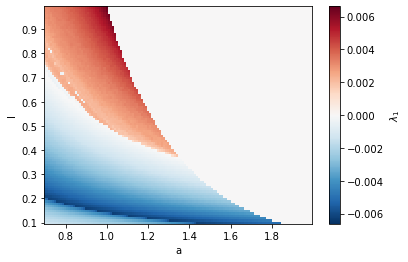

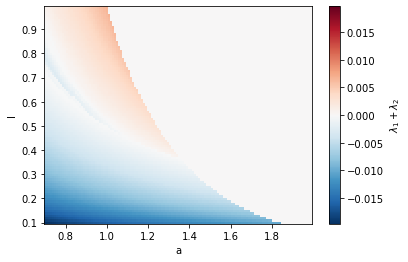

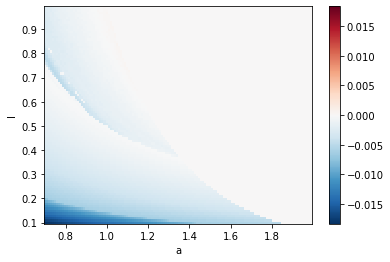

In [42]:
l1.name = 'mean($\lambda_1$)'
l2.name = '$\lambda_1+\lambda_2$'
plt.figure()
plt.title('Mean first Lyapunov Exponent')
l1.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov1.pdf')
plt.show()

plt.figure()
l2.mean(axis=(0,1)).plot()
plt.savefig(imagefolder + 'Mean_lyapunov_sum_12.pdf')
plt.show()

plt.figure()
(l2-l1).mean(axis=(0,1)).plot()
plt.show()

In [10]:
# l1.to_netcdf('data/lyapunov1.nc')
# l2.to_netcdf('data/lyapunov2.nc')

In [14]:
l1 = xr.open_dataset('data/lyapunov1.nc').__xarray_dataarray_variable__
l2 = xr.open_dataset('data/lyapunov2.nc').__xarray_dataarray_variable__
l1, l2

(<xarray.DataArray '__xarray_dataarray_variable__' (x: 10, y: 10, l: 90, a: 130)>
 [1170000 values with dtype=float64]
 Coordinates:
   * a        (a) float64 0.7 0.71 0.72 0.73 0.74 ... 1.95 1.96 1.97 1.98 1.99
   * l        (l) float64 0.1 0.11 0.12 0.13 0.14 ... 0.95 0.96 0.97 0.98 0.99
   * x        (x) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * y        (y) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0,
 <xarray.DataArray '__xarray_dataarray_variable__' (x: 10, y: 10, l: 90, a: 130)>
 [1170000 values with dtype=float64]
 Coordinates:
   * a        (a) float64 0.7 0.71 0.72 0.73 0.74 ... 1.95 1.96 1.97 1.98 1.99
   * l        (l) float64 0.1 0.11 0.12 0.13 0.14 ... 0.95 0.96 0.97 0.98 0.99
   * x        (x) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0
   * y        (y) float64 -10.0 -7.778 -5.556 -3.333 ... 3.333 5.556 7.778 10.0)

In [40]:
stacked1 = l1.stack(z=('x','y','l','a'))
stacked2 = l2.stack(z=('x','y','l','a'))
stacked1 = stacked1.to_pandas()
stacked1 = stacked1.reset_index()
stacked1.columns = ['x_0', 'y_0', 'lambda', 'a', 'lyapunov1']
stacked1['lyapunov_sum_12'] = stacked2.values
stacked1.to_csv('data/full_data.dat', index = False)